### V1535 Sco Spectral Index Work

In [1]:
#imports imports imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
#now to get all of the data

In [3]:
data = ([57067.5, 4.55, 4.132, 0.0203],#B
[57067.5, 7.38, 2.786, 0.0128],
[57067.5, 28.2, 0.819, 0.0575],
[57067.5, 36.5, 0.675, 0.0834],

        [57071.5, 13.5, 0.416, 0.0175], #B
[57071.5, 17.4, 0.344, 0.0213],
[57071.5, 28.2, 0.295, 0.0505],
[57071.5, 36.5, 0.376, 0.0714],

[57072.5, 1.26, 1.57, 0.0765], #B
[57072.5, 1.74, 1.21, 0.0728],
[57072.5, 4.55, 0.65, 0.0168],
[57072.5, 7.38, 0.439, 0.0126],

[57072.5, 4.87, 0.484, 0.0505], #VLBA

[57077.6, 13.5, 0.385, 0.0163], #B
[57077.6, 17.4, 0.456, 0.02],
[57077.6, 28.2, 0.785, 0.0485],
[57077.6, 36.5, 0.845, 0.0758],

[57077.7, 4.87, 0.155, 0.0409], #VLBA

[57082.5, 1.26, 0.0142, 0.101], #B
[57082.5, 1.74, 0.12, 0.0655],
[57082.5, 4.55, 0.221, 0.0181],
[57082.5, 7.38, 0.192, 0.0157],

[57088.5, 13.5, 0.585, 0.0166], #B
[57088.5, 17.4, 0.755, 0.0207],
[57088.5, 28.2, 1.15, 0.0462],
[57088.5, 36.5, 1.68, 0.071],

[57091.4, 1.26, 0.153, 0.0738], #B
[57091.4, 1.74, 0.11, 0.0538],
[57091.4, 4.55, 0.455, 0.0187],
[57091.4, 7.38, 0.536, 0.0136],

[57106.42, 13.5, 0.267, 0.0126], #B
[57106.42, 17.4, 0.299, 0.0143],
[57106.42, 28.2, 0.348, 0.0405],
[57106.42, 36.5, 0.186, 0.0551],

[57106.47, 1.26, 0.273, 0.112], #B
[57106.47, 1.74, 0.163, 0.0597],
[57106.47, 4.55, 0.222, 0.0161],
[57106.47, 7.38, 0.253, 0.012],

[57119.41, 13.5, 0.457, 0.0248], #B
[57119.41, 17.4, 0.399, 0.0182],
[57119.41, 28.2, 0.323, 0.0446],
[57119.41, 36.5, 0.276, 0.0602],

[57120.57, 1.26, 0.873, 0.1], #B
[57120.57, 1.74, 0.661, 0.0562],
[57120.57, 4.55, 0.483, 0.0191],
[57120.57, 7.38, 0.374, 0.0138],

[57130.35, 1.26, 0.444, 0.0813], #B
[57130.35, 1.74, 0.258, 0.056],
[57130.35, 4.55, 0.256, 0.0172],
[57130.35, 7.38, 0.228, 0.0117],

[57131.33, 13.5, 0.209, 0.0156], #B
[57131.33, 17.4, 0.167, 0.0221],
[57131.33, 28.2, 0.173, 0.0482],
[57131.33, 36.5, 0.0395, 0.0833],

[57143.3, 1.26, -0.0723, 0.106], #B
[57143.3, 1.74, 0.165, 0.0711],
[57143.3, 4.55, 0.17, 0.0183],
[57143.3, 7.38, 0.139, 0.0144],

[57143.34, 13.5, 0.129, 0.0168], #B
[57143.34, 17.4, 0.164, 0.0216],
[57143.34, 28.2, 0.174, 0.0523],
[57143.34, 36.5, 0.0153, 0.0753],

[57158.3, 1.26, -0.152, 0.177], #B_> BnA
[57158.3, 1.74, 0.101, 0.0784],
[57158.3, 4.55, 0.0727, 0.023],
[57158.3, 7.38, 0.0708, 0.0171],
[57158.3, 13.5, 0.0518, 0.0175],
[57158.3, 16.5, 0.0217, 0.0214],
[57158.3, 29.5, 0.0401, 0.0362],
[57158.3, 35, -0.00361, 0.045],

[57187.2, 1.26, 0.277, 0.116], #BnA _> A
[57187.2, 1.74, -0.0505, 0.0776],
[57187.2, 5, 0.0194, 0.0204],
[57187.2, 7, 0.044, 0.0223],
[57187.2, 13.5, 0.0587, 0.0157],
[57187.2, 16.5, 0.0569, 0.021],
[57187.2, 29.5, 0.13, 0.0446],
[57187.2, 35, -0.0206, 0.0588],

#57360.7	1.26	XX	XX #D
#57360.7	1.74	XX	XX
[57360.7, 5, 0.0795, 0.031],
[57360.7, 7, 0.0561, 0.022],
[57360.7, 13.5, -0.0000599, 0.0196],
[57360.7, 16.5, -0.000577, 0.0199],
[57360.7, 29.6, -0.0157, 0.051],
[57360.7, 35, 0.0632, 0.0608],)



df =  pd.DataFrame(data, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [4]:
#splitting it up by day

In [6]:


E1 = ([57067.5, 4.55, 4.132, 0.0203],#B
[57067.5, 7.38, 2.786, 0.0128],
[57067.5, 28.2, 0.819, 0.0575],
[57067.5, 36.5, 0.675, 0.0834],)

E2 = ( [57071.5, 13.5, 0.416, 0.0175], #B
[57071.5, 17.4, 0.344, 0.0213],
[57071.5, 28.2, 0.295, 0.0505],
[57071.5, 36.5, 0.376, 0.0714],				
    )

E3 = ([57072.5, 1.26, 1.57, 0.0765], #B
[57072.5, 1.74, 1.21, 0.0728],
[57072.5, 4.55, 0.65, 0.0168],
[57072.5, 7.38, 0.439, 0.0126],

[57072.5, 4.87, 0.484, 0.0505], #VLBA
    )

E4 = ([57077.6, 13.5, 0.385, 0.0163], #B
[57077.6, 17.4, 0.456, 0.02],
[57077.6, 28.2, 0.785, 0.0485],
[57077.6, 36.5, 0.845, 0.0758],

[57077.7, 4.87, 0.155, 0.0409], #VLBA
    )

E5 = ([57082.5, 1.26, 0.0142, 0.101], #B
[57082.5, 1.74, 0.12, 0.0655],
[57082.5, 4.55, 0.221, 0.0181],
[57082.5, 7.38, 0.192, 0.0157],				
    )

E6 = (	[57088.5, 13.5, 0.585, 0.0166], #B
[57088.5, 17.4, 0.755, 0.0207],
[57088.5, 28.2, 1.15, 0.0462],
[57088.5, 36.5, 1.68, 0.071],			
    )

E7 = ([57091.4, 1.26, 0.153, 0.0738], #B
[57091.4, 1.74, 0.11, 0.0538],
[57091.4, 4.55, 0.455, 0.0187],
[57091.4, 7.38, 0.536, 0.0136],
    )

E8 = ([57106.42, 13.5, 0.267, 0.0126], #B
[57106.42, 17.4, 0.299, 0.0143],
[57106.42, 28.2, 0.348, 0.0405],
[57106.42, 36.5, 0.186, 0.0551],

[57106.47, 1.26, 0.273, 0.112], #B
[57106.47, 1.74, 0.163, 0.0597],
[57106.47, 4.55, 0.222, 0.0161],
[57106.47, 7.38, 0.253, 0.012],
    )

E9 = ([57119.41, 13.5, 0.457, 0.0248], #B
[57119.41, 17.4, 0.399, 0.0182],
[57119.41, 28.2, 0.323, 0.0446],
[57119.41, 36.5, 0.276, 0.0602],
    )

E10 = ([57120.57, 1.26, 0.873, 0.1], #B
[57120.57, 1.74, 0.661, 0.0562],
[57120.57, 4.55, 0.483, 0.0191],
[57120.57, 7.38, 0.374, 0.0138],
    )

E11 = ([57130.35, 1.26, 0.444, 0.0813], #B
[57130.35, 1.74, 0.258, 0.056],
[57130.35, 4.55, 0.256, 0.0172],
[57130.35, 7.38, 0.228, 0.0117],

				
    )

E12 = (		[57131.33, 13.5, 0.209, 0.0156], #B
[57131.33, 17.4, 0.167, 0.0221],
[57131.33, 28.2, 0.173, 0.0482],
[57131.33, 36.5, 0.0395, 0.0833],		
    )


E13 =([57143.3, 1.26, -0.0723, 0.106], #B
[57143.3, 1.74, 0.165, 0.0711],
[57143.3, 4.55, 0.17, 0.0183],
[57143.3, 7.38, 0.139, 0.0144],

[57143.34, 13.5, 0.129, 0.0168], #B
[57143.34, 17.4, 0.164, 0.0216],
[57143.34, 28.2, 0.174, 0.0523],
[57143.34, 36.5, 0.0153, 0.0753],
    )

E14 = ([57158.3, 1.26, -0.152, 0.177], #B_> BnA
[57158.3, 1.74, 0.101, 0.0784],
[57158.3, 4.55, 0.0727, 0.023],
[57158.3, 7.38, 0.0708, 0.0171],
[57158.3, 13.5, 0.0518, 0.0175],
[57158.3, 16.5, 0.0217, 0.0214],
[57158.3, 29.5, 0.0401, 0.0362],
[57158.3, 35, -0.00361, 0.045],
    )

E15 = ([57187.2, 1.26, 0.277, 0.116], #BnA _> A
[57187.2, 1.74, -0.0505, 0.0776],
[57187.2, 5, 0.0194, 0.0204],
[57187.2, 7, 0.044, 0.0223],
[57187.2, 13.5, 0.0587, 0.0157],
[57187.2, 16.5, 0.0569, 0.021],
[57187.2, 29.5, 0.13, 0.0446],
[57187.2, 35, -0.0206, 0.0588],
				
    )

E16 = (#57360.7	1.26	XX	XX #D
#57360.7	1.74	XX	XX
[57360.7, 5, 0.0795, 0.031],
[57360.7, 7, 0.0561, 0.022],
[57360.7, 13.5, -0.0000599, 0.0196],
[57360.7, 16.5, -0.000577, 0.0199],
[57360.7, 29.6, -0.0157, 0.051],
[57360.7, 35, 0.0632, 0.0608],)

In [7]:
df1 =  pd.DataFrame(E1, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df2 =  pd.DataFrame(E2, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df3 =  pd.DataFrame(E3, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df4 =  pd.DataFrame(E4, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df5 =  pd.DataFrame(E5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df6 =  pd.DataFrame(E6, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df7 =  pd.DataFrame(E7, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df8 =  pd.DataFrame(E8, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df9 =  pd.DataFrame(E9, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df10 =  pd.DataFrame(E10, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df11 =  pd.DataFrame(E11, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df12 =  pd.DataFrame(E12, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df13 =  pd.DataFrame(E13, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df14 =  pd.DataFrame(E14, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df15 =  pd.DataFrame(E15, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df16 =  pd.DataFrame(E16, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

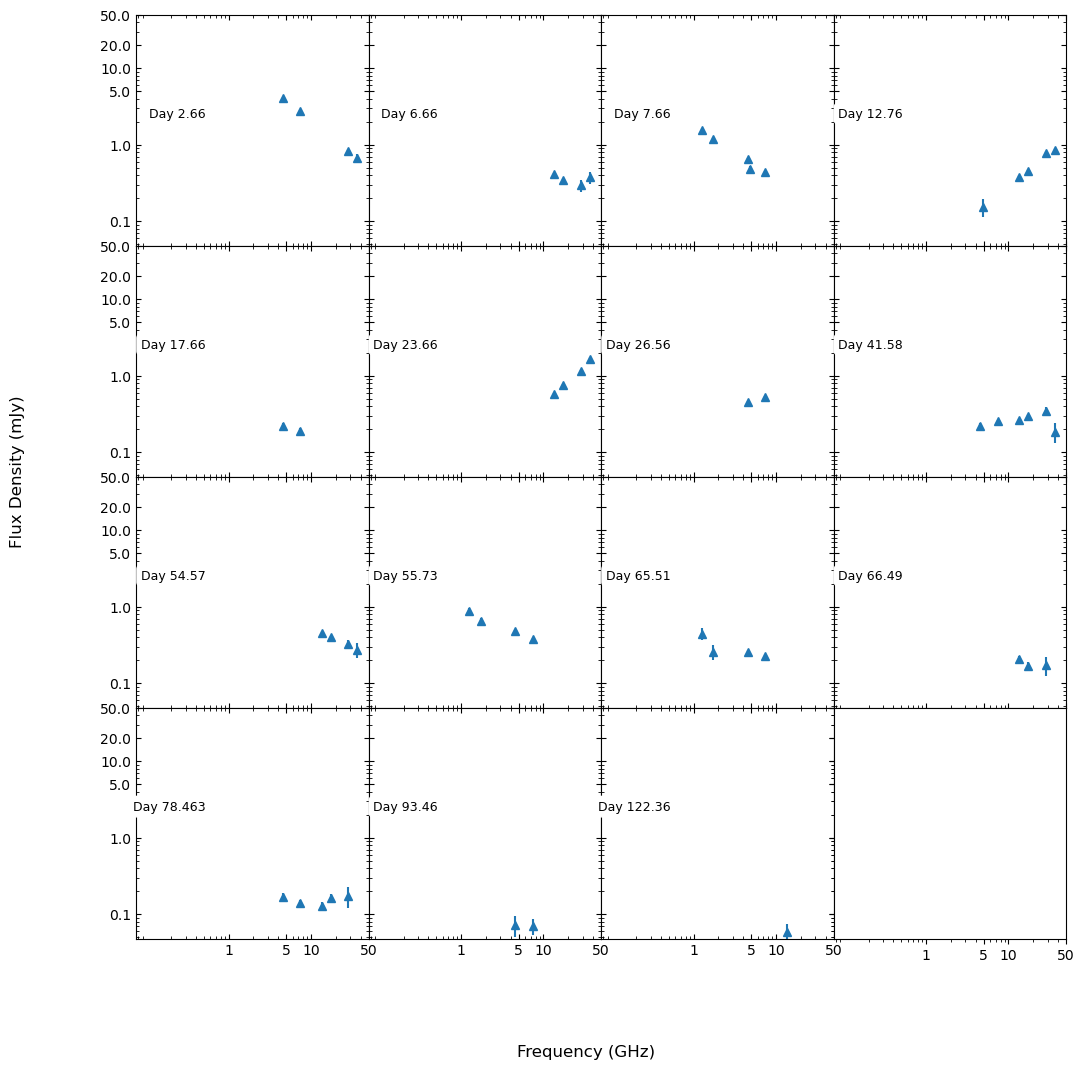

In [8]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16]


#the days by the list so they can all be defined
annotations = ['Day 2.66', 'Day 6.66', 'Day 7.66', 'Day 12.76', 'Day 17.66', 'Day 23.66',
               'Day 26.56', 'Day 41.58', 'Day 54.57', 'Day 55.73', 'Day 65.51', 'Day 66.49',
               'Day 78.463', 'Day 93.46', 'Day 122.36', 'Day 295.86' ]

#making the figure (4,4) is the (rows, columns)
fig, ax = plt.subplots(4, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux Density (mJy)'] > 3 * df['Uncertainty (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux Density (mJy)'][mask], yerr=df['Uncertainty (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([.1, 1, 5, 10, 20, 50], labels=['0.1','1.0', '5.0', '10.0', '20.0', '50.0'])
        ax[row, col].annotate(label, xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Finding the alpha for each day

#### Day 2.7

In [229]:
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x1 = df1['Freq (GHz)'][mask].values.tolist()
    y1 = df1['Flux Density (mJy)'][mask].values.tolist()
    yerr1 = df1['Uncertainty (mJy)'][mask].values.tolist()


In [230]:
PL1 =  PowerLaw1D(amplitude = y1[0], x_0= x1[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x1), max(x1)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit1 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model1 = fit1(PL1, x1, y1, maxiter=10000)

    #weight is 1/error^2
y_weight1 = 1/ (np.power(yerr1,2))  

    # fit the data using the uncertainties as weights
fit_model_weights1 = fit1(PL1, x1, y1, weights=y_weight1, maxiter=10000)

fit_model_weights1

<PowerLaw1D(amplitude=3.70995769, x_0=5.26578684, alpha=0.88702056)>

In [231]:
fit1.fit_info['message']

'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000'

In [232]:
print(fit1.fit_info)

{'nfev': 14, 'fvec': array([ 5.52079343, -4.97815754,  3.64547399, -1.09944829]), 'fjac': array([[-3.47694328e+02,  7.68842161e+01,  4.80481375e+01,
        -4.57906573e-01],
       [ 7.68842161e+01, -1.07926622e+02, -6.74478251e+01,
         1.68805445e-01],
       [ 4.80481375e+01, -6.74478251e+01,  7.94410929e-15,
         4.47213595e-01]]), 'ipvt': array([3, 1, 2], dtype=int32), 'qtf': array([-3.50971151e-05,  4.99129849e-05, -8.00938102e+00]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 6.18854158e+27, -9.90259338e+27,  2.48959179e+11],
       [-9.90259338e+27,  1.58456325e+28, -3.98371973e+11],
       [ 2.48959179e+11, -3.98371973e+11,  2.24850857e-05]]), 'njev': 6, 'cov_x': array([[ 6.18854158e+27, -9.90259338e+27,  2.48959179e+11],
       [-9.90259338e+27,  1.58456325e+28, -3.98371973e+11],
       [ 2.48959179e+11, -3.98371973e+11,  2.24850857e-05]])}


In [233]:
param_cov1= np.array([[ 6.18854158e+27, -9.90259338e+27,  2.48959179e+11],
       [-9.90259338e+27,  1.58456325e+28, -3.98371973e+11],
       [ 2.48959179e+11, -3.98371973e+11,  2.24850857e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag1 = stand(param_cov1) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag1[2]) #Just showing the standard devation on the slope


The standard deviation is 0.004741844124388738


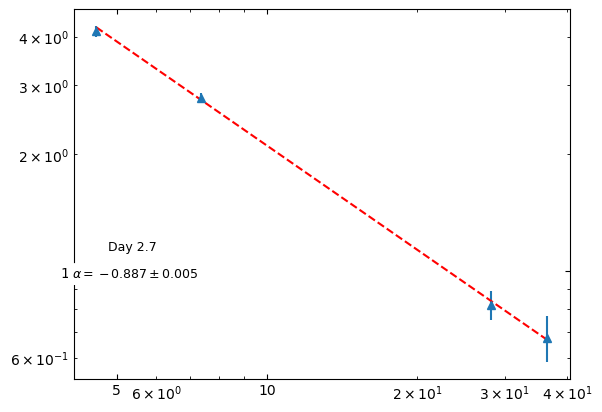

In [234]:
fig,ax = plt.subplots()
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df1['Freq (GHz)'][mask], df1['Flux Density (mJy)'][mask], yerr=df1['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 2.7', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df1['Freq (GHz)'][mask], fit_model_weights1(df1['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.887 \\pm 0.005}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    #ax.annotate('${\u03B1 2 =  \\pm }$', xy=(90, 60), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
plt.show();

#### Day 6.66

In [235]:
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x2 = df2['Freq (GHz)'][mask].values.tolist()
    y2 = df2['Flux Density (mJy)'][mask].values.tolist()
    yerr2 = df2['Uncertainty (mJy)'][mask].values.tolist()


In [236]:
PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x2), max(x2)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit2 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model2 = fit2(PL2, x2, y2)

    #weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2,2))  

    # fit the data using the uncertainties as weights
fit_model_weights2 = fit2(PL2, x2, y2, weights=y_weight2)

fit_model_weights2

<PowerLaw1D(amplitude=0.35599365, x_0=17.05960692, alpha=0.63831379)>

In [285]:
print(y_weight2)

[2267.57369615 1736.11111111  355.99857601  182.61504748]


In [284]:
print(y2, yerr2)

[0.416, 0.344, 0.295, 0.376] [0.021, 0.024, 0.053, 0.074]


In [237]:
print(fit2.fit_info)

{'nfev': 13, 'fvec': array([ -6.01016109,  13.07710678, -13.0679728 , -28.65694293]), 'fjac': array([[-3.15445570e+03, -1.71663073e+02, -4.20176630e+01,
         3.56255734e-02],
       [-1.71663073e+02,  1.47829873e+02,  3.66047052e-15,
         2.57197464e-01],
       [-4.20176630e+01, -3.37886581e-15,  1.26470186e-15,
         4.04668937e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([ 4.07198110e-04, -2.34594317e-07,  2.72207212e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 1.10927343e+26, -8.32781655e+27, -1.90344306e+11],
       [-8.32781655e+27,  6.25206794e+29,  1.42900066e+13],
       [-1.90344306e+11,  1.42900066e+13,  3.72377695e-04]]), 'njev': 6, 'cov_x': array([[ 1.10927343e+26, -8.32781655e+27, -1.90344306e+11],
       [-8.32781655e+27,  6.25206794e+29,  1.42900066e+13],
       [-1.90344306e+11,  1.42900066e+13,  3.72377695e-04]])}


In [283]:
param_cov2 = np.array([[ 1.10927343e+26, -8.32781655e+27, -1.90344306e+11],
       [-8.32781655e+27,  6.25206794e+29,  1.42900066e+13],
       [-1.90344306e+11,  1.42900066e+13,  3.72377695e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag2 = stand(param_cov2) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag2[2]) #Just showing the standard devation on the slope
print(diag2[1], diag2[0], diag2[2])

The standard deviation is 0.019297090324709578
790700192234705.4 10532205039781.555 0.019297090324709578


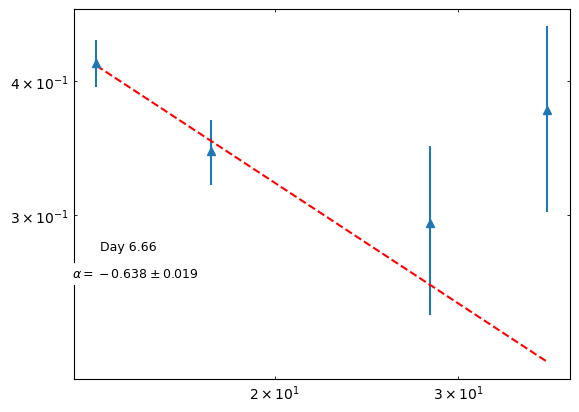

In [239]:
fig,ax = plt.subplots()
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Freq (GHz)'][mask], df2['Flux Density (mJy)'][mask], yerr=df2['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 6.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.638 \\pm 0.019}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 7.66

In [240]:
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x3 = df3['Freq (GHz)'][mask].values.tolist()
    y3 = df3['Flux Density (mJy)'][mask].values.tolist()
    yerr3 = df3['Uncertainty (mJy)'][mask].values.tolist()


In [241]:
PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x3), max(x3)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit3 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model3 = fit3(PL3, x3, y3)

    #weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3,2))  

    # fit the data using the uncertainties as weights
fit_model_weights3 = fit3(PL3, x3, y3, weights=y_weight3)
fit_model_weights3

<PowerLaw1D(amplitude=1.65045454, x_0=1.2833599, alpha=0.75298386)>

In [242]:
print(fit3.fit_info)

{'nfev': 17, 'fvec': array([ 12.77068734,  15.60382519, -20.14852239,   9.67870147]), 'fjac': array([[-2.66863728e+03,  9.96835222e+02,  9.65304087e+02,
        -8.94506598e-01],
       [ 9.96835222e+02, -2.13617007e+02, -2.06860036e+02,
         2.25709870e-01],
       [ 9.65304087e+02, -2.06860036e+02, -9.23705556e-14,
         1.00000000e+00]]), 'ipvt': array([3, 1, 2], dtype=int32), 'qtf': array([-1.82860512e-04,  3.77963859e-05, -1.86528054e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 1.09904235e+26, -1.13494197e+26,  1.64614537e+10],
       [-1.13494197e+26,  1.17201424e+26, -1.69991582e+10],
       [ 1.64614537e+10, -1.69991582e+10,  5.66372148e-06]]), 'njev': 8, 'cov_x': array([[ 1.09904235e+26, -1.13494197e+26,  1.64614537e+10],
       [-1.13494197e+26,  1.17201424e+26, -1.69991582e+10],
       [ 1.64614537e+10, -1.69991582e+10,  5.66372148e-06]])}


In [243]:
param_cov3= np.array([[ 1.09904235e+26, -1.13494197e+26,  1.64614537e+10],
       [-1.13494197e+26,  1.17201424e+26, -1.69991582e+10],
       [ 1.64614537e+10, -1.69991582e+10,  5.66372148e-06]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag3 = stand(param_cov3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag3[2]) #Just showing the standard devation on the slope


The standard deviation is 0.00237985744951247


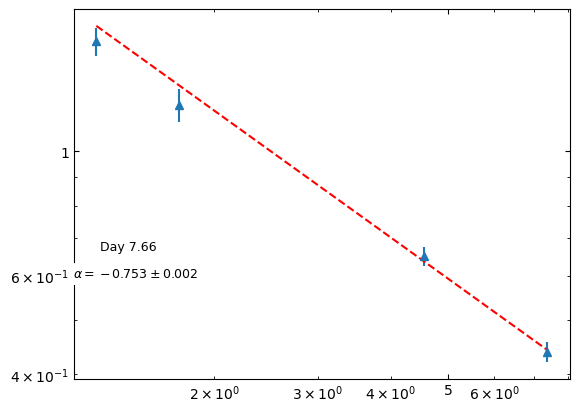

In [244]:
fig,ax = plt.subplots()
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq (GHz)'][mask], df3['Flux Density (mJy)'][mask], yerr=df3['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 7.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.753 \\pm 0.002}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 12.76

In [245]:
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x4 = df4['Freq (GHz)'][mask].values.tolist()
    y4 = df4['Flux Density (mJy)'][mask].values.tolist()
    yerr4 = df4['Uncertainty (mJy)'][mask].values.tolist()


In [246]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= 1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x4), max(x4)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4, maxiter=10000)

    #weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4,2))  

    # fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4, maxiter=10000)

fit_model_weights4

<PowerLaw1D(amplitude=0.38111808, x_0=13.5, alpha=-0.79237029)>

In [247]:
print(fit4.fit_info)

{'nfev': 31, 'fvec': array([ -9.70481082,  17.37061603, -26.48156138,  -0.90262243]), 'fjac': array([[-4.37594062e+03,  7.87131995e+02,  1.38419441e+02,
         8.73757859e-02],
       [ 7.87131995e+02,  2.82632600e+02,  1.32131734e-12,
         4.75875380e-01],
       [ 1.38419441e+02, -8.45324486e-16,  1.56232843e-15,
        -9.84284871e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([ 6.42633769e-04,  9.02300674e-05, -4.75903913e-01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[4.09927138e+26, 1.29592837e+28, 3.87598594e+10],
       [1.29592837e+28, 4.09689965e+29, 1.22533975e+12],
       [3.87598594e+10, 1.22533975e+12, 1.61834549e-05]]), 'njev': 18, 'cov_x': array([[4.09927138e+26, 1.29592837e+28, 3.87598594e+10],
       [1.29592837e+28, 4.09689965e+29, 1.22533975e+12],
       [3.87598594e+10, 1.22533975e+12, 1.61834549e-05]])}


In [248]:
param_cov4= np.array([[4.09927138e+26, 1.29592837e+28, 3.87598594e+10],
       [1.29592837e+28, 4.09689965e+29, 1.22533975e+12],
       [3.87598594e+10, 1.22533975e+12, 1.61834549e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(param_cov4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag4[2]) #Just showing the standard devation on the slope


The standard deviation is 0.004022866502880751


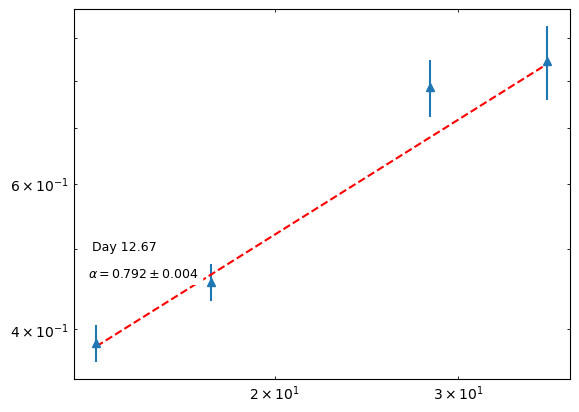

In [249]:
fig,ax = plt.subplots()
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq (GHz)'][mask], df4['Flux Density (mJy)'][mask], yerr=df4['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 12.67', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.792 \\pm 0.004}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 17.66

In [250]:
mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x5 = df5['Freq (GHz)'][mask].values.tolist()
    y5 = df5['Flux Density (mJy)'][mask].values.tolist()
    yerr5 = df5['Uncertainty (mJy)'][mask].values.tolist()


In [251]:
PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= .2,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x5), max(x5)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5, maxiter=10000)

    #weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5,2))  

    # fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5, maxiter=10000)

fit_model_weights5

<PowerLaw1D(amplitude=0.32510639, x_0=1.26, alpha=0.2987147)>

In [252]:
print(fit5.fit_info)

{'nfev': 17, 'fvec': array([ 0.81063873, -4.99901897,  1.49277736, -0.90922013]), 'fjac': array([[-2.76598413e+03,  1.39240564e+03, -2.17102813e+02,
         7.31579199e-01],
       [ 1.40654757e+03, -2.36300445e+02,  1.68516033e+01,
        -7.93353612e-01],
       [-2.19307812e+02, -3.05554285e-14,  5.57255204e-14,
         6.92954823e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([-5.01101852e-04, -1.24718169e-04,  1.02064719e+00]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 2.02441976e+24, -2.55326652e+25,  3.30156606e+09],
       [-2.55326652e+25,  3.22026591e+26, -4.16404654e+10],
       [ 3.30156606e+09, -4.16404654e+10,  2.32934090e-05]]), 'njev': 9, 'cov_x': array([[ 2.02441976e+24, -2.55326652e+25,  3.30156606e+09],
       [-2.55326652e+25,  3.22026591e+26, -4.16404654e+10],
       [ 3.30156606e+09, -4.16404654e+10,  2.32934090e-05]])}


In [253]:
param_cov5= np.array([[ 2.02441976e+24, -2.55326652e+25,  3.30156606e+09],
       [-2.55326652e+25,  3.22026591e+26, -4.16404654e+10],
       [ 3.30156606e+09, -4.16404654e+10,  2.32934090e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag5 = stand(param_cov5) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag5[2]) #Just showing the standard devation on the slope


The standard deviation is 0.004826324585023266


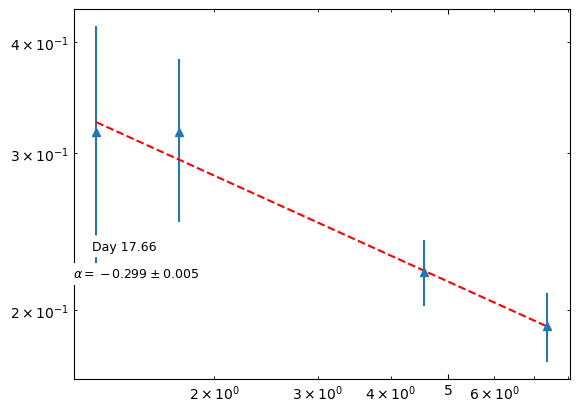

In [254]:
fig,ax = plt.subplots()
mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq (GHz)'][mask], df5['Flux Density (mJy)'][mask], yerr=df5['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 17.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.299 \\pm 0.005}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 23.66

In [255]:
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x6 = df6['Freq (GHz)'][mask].values.tolist()
    y6 = df6['Flux Density (mJy)'][mask].values.tolist()
    yerr6 = df6['Uncertainty (mJy)'][mask].values.tolist()


In [256]:
PL6 =  PowerLaw1D(amplitude = y6[0], x_0= x6[0], alpha= -1,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x6), max(x6)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit6 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model6 = fit6(PL6, x6, y6, maxiter=10000)

    #weight is 1/error^2
y_weight6 = 1/ (np.power(yerr6,2))  

    # fit the data using the uncertainties as weights
fit_model_weights6 = fit6(PL6, x6, y6, weights=y_weight6, maxiter=10000)

fit_model_weights6

<PowerLaw1D(amplitude=0.58657606, x_0=13.52296302, alpha=-0.98666923)>

In [257]:
print(fit6.fit_info)

{'nfev': 11, 'fvec': array([ 1.02999983, -2.89745038, 11.19175063, -9.71763945]), 'fjac': array([[-2.23242133e+03,  1.57950649e+02,  9.55443776e+01,
         9.86905042e-02],
       [ 1.57950649e+02,  2.39173324e+02,  6.80098942e-15,
         5.00044054e-01],
       [ 9.55443776e+01, -5.19879446e-15,  5.15898030e-15,
         3.97971045e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([ 4.54418926e-05, -2.74116363e-06, -7.83393259e+00]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[6.88224623e+25, 1.60805624e+27, 3.49535380e+10],
       [1.60805624e+27, 3.75726875e+28, 8.16699272e+11],
       [3.49535380e+10, 8.16699272e+11, 3.52335277e-05]]), 'njev': 4, 'cov_x': array([[6.88224623e+25, 1.60805624e+27, 3.49535380e+10],
       [1.60805624e+27, 3.75726875e+28, 8.16699272e+11],
       [3.49535380e+10, 8.16699272e+11, 3.52335277e-05]])}


In [258]:
param_cov6= np.array([[6.88224623e+25, 1.60805624e+27, 3.49535380e+10],
       [1.60805624e+27, 3.75726875e+28, 8.16699272e+11],
       [3.49535380e+10, 8.16699272e+11, 3.52335277e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag6 = stand(param_cov6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag6[2]) #Just showing the standard devation on the slope


The standard deviation is 0.005935783663510658


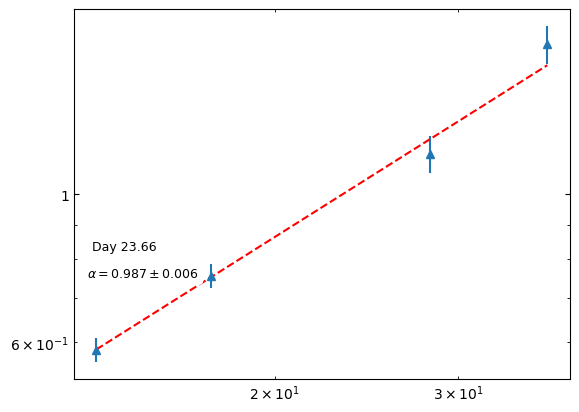

In [259]:
fig,ax = plt.subplots()
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df6['Freq (GHz)'][mask], df6['Flux Density (mJy)'][mask], yerr=df6['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 23.66', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.987 \\pm 0.006}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 26.56

In [260]:
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x7 = df7['Freq (GHz)'][mask].values.tolist()
    y7 = df7['Flux Density (mJy)'][mask].values.tolist()
    yerr7 = df7['Uncertainty (mJy)'][mask].values.tolist()


In [261]:
PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= -.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        'x_0': (min(x7), max(x7)),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    }) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7, maxiter=10000)

    #weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7,2))  

    # fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7, maxiter=10000)

fit_model_weights7

<PowerLaw1D(amplitude=0.32486307, x_0=1.75706039, alpha=-0.34976642)>

In [262]:
print(fit7.fit_info)

{'nfev': 16, 'fvec': array([-15.48695467,  18.09201113,  -3.51592429,   1.49637834]), 'fjac': array([[-4.59731710e+03,  1.89085149e+03,  2.97397569e+02,
         8.14951065e-01],
       [ 1.89085149e+03, -3.77007275e+02, -1.52110590e-12,
        -7.22877577e-01],
       [ 2.97397569e+02, -2.18228397e-14,  1.85520621e-14,
         8.04738748e-01]]), 'ipvt': array([1, 3, 2], dtype=int32), 'qtf': array([-1.08841378e-03, -8.87399310e-09, -1.72898323e+01]), 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000', 'ierr': 1, 'param_jac': None, 'param_cov': array([[ 1.21585428e+25,  1.87952703e+26, -1.08795294e+10],
       [ 1.87952703e+26,  2.90546483e+27, -1.68181087e+11],
       [-1.08795294e+10, -1.68181087e+11,  1.67706515e-05]]), 'njev': 7, 'cov_x': array([[ 1.21585428e+25,  1.87952703e+26, -1.08795294e+10],
       [ 1.87952703e+26,  2.90546483e+27, -1.68181087e+11],
       [-1.08795294e+10, -1.68181087e+11,  1.67706515e-05]])}


In [263]:
param_cov7 = np.array([[ 1.21585428e+25,  1.87952703e+26, -1.08795294e+10],
       [ 1.87952703e+26,  2.90546483e+27, -1.68181087e+11],
       [-1.08795294e+10, -1.68181087e+11,  1.67706515e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag7 = stand(param_cov7) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation is", diag7[2]) #Just showing the standard devation on the slope


The standard deviation is 0.004095198591033162


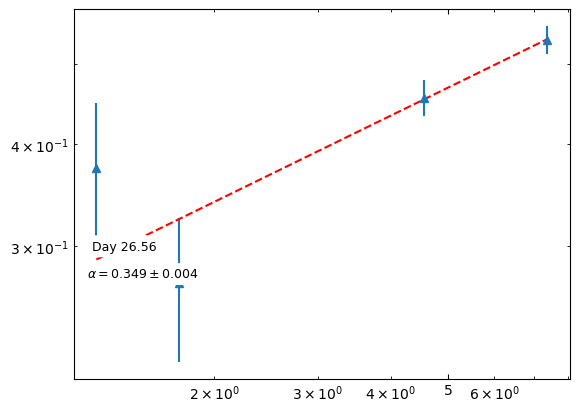

In [264]:
fig,ax = plt.subplots()
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq (GHz)'][mask], df7['Flux Density (mJy)'][mask], yerr=df7['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 26.56', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.349 \\pm 0.004}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

#### Day 41.58

In [265]:
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():
    x8 = df8['Freq (GHz)'][mask].values.tolist()
    y8 = df8['Flux Density (mJy)'][mask].values.tolist()
    yerr8 = df8['Uncertainty (mJy)'][mask].values.tolist()


In [279]:
#Initialize fitters
fitBPL = fitting.LevMarLSQFitter(calc_uncertainties=True)
#print(fitBPL.fit_info)

#A function that will produce a broken power law for given input values
#Also fits the BPL using LevMarLSQFitter 
#Issue: not all BPL's work so I get an error when trying to fit it to the data 

def bpl_func(freq, flux, er, a1, a2):
    wt = 1 / (np.power(er,2))
    peak = np.max(flux)
    BPL = []
    
    for i in range(0,len(freq)):
        for j in range(0,len(a1)):
            bro = BrokenPowerLaw1D(peak, freq[i], alpha_1 = a1[j], alpha_2 = a2[j])
            BPL.append(bro)
        
        
    return(BPL)

#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(0.1,40,0.4)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(0,1,0.2)
a2 = np.arange(-1,0,0.2)

BM8 = bpl_func(x_val, y8, yerr8, a1, a2)
print(BM8[25])


weight8 = 1/ (np.power(yerr8,2))


fw_BPL8 = fitBPL(BM8[25], x8, y8, weights=weight8)    

print(fw_BPL8)

Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude x_break alpha_1 alpha_2
    --------- ------- ------- -------
        0.609     2.1     0.0    -1.0
Model: BrokenPowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude           x_break            alpha_1             alpha_2      
    ------------------ ------------------ ------------------ -------------------
    0.1934373199516327 1.9903102286240966 2.5085693743807393 -0.1880676638704611


In [280]:
print(fitBPL.fit_info)

{'nfev': 9, 'fvec': array([ 4.56424113e+01, -2.82909118e+01, -1.52533383e+01, -5.51981446e+00,
       -3.95218332e-08, -5.11838874e-08,  1.37781017e+01, -2.80581324e+01]), 'fjac': array([[-1.13078650e+04,  4.60057615e-01,  7.52042659e-02,
         5.05235964e-02,  2.21954297e-02,  3.44143200e-02,
         3.57483244e-01,  5.77298100e-01],
       [ 3.56837879e+03,  1.02119623e+03,  1.47823813e-01,
         1.27230287e-01, -8.24069211e-02, -1.27773068e-01,
        -6.94131384e-01, -5.22897639e-01],
       [ 2.01719082e+02,  1.73671197e+01, -1.20015453e+02,
         1.26356333e-02,  5.38466330e-01,  8.34899473e-01,
        -8.57071680e-02, -7.27228991e-02],
       [-8.40796732e-01,  2.93800655e+00, -2.03030897e+01,
        -1.31691062e+01,  8.40378484e-01, -5.42000004e-01,
         3.54081487e-16,  6.57579905e-16]]), 'ipvt': array([1, 4, 2, 3], dtype=int32), 'qtf': array([-7.70285836e-05, -1.36369070e-04,  9.42215348e-04, -9.30815764e-04]), 'message': 'Both actual and predicted relative r

In [281]:
param_cov8 = np.array([[ 1.69250454e-07,  3.88263060e-06, -1.78309749e-05, 2.87874216e-07],
       [ 3.88263060e-06,  2.34473265e-04, -9.75532211e-04, -1.18075015e-06],
       [-1.78309749e-05, -9.75532211e-04,  5.76615447e-03, -2.18665382e-20],
       [ 2.87874216e-07, -1.18075015e-06, -2.18665382e-20, 9.78998109e-07]]), 

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #error 1
    sd4 = np.sqrt(diag[3]) #error 2
    return(sd1,sd2,sd3, sd4)

diag8 = stand(param_cov8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print("The standard deviation 1 is", diag8[2], 'the second is', diag8[3]) #Just showing the standard devation on the slope


The standard deviation 1 is [nan] the second is [0.00053654]


C:\Users\wilhe\AppData\Local\Temp\ipykernel_1632\1423196892.py:10: RuntimeWarning: invalid value encountered in sqrt
  sd3 = np.sqrt(diag[2]) #error 1


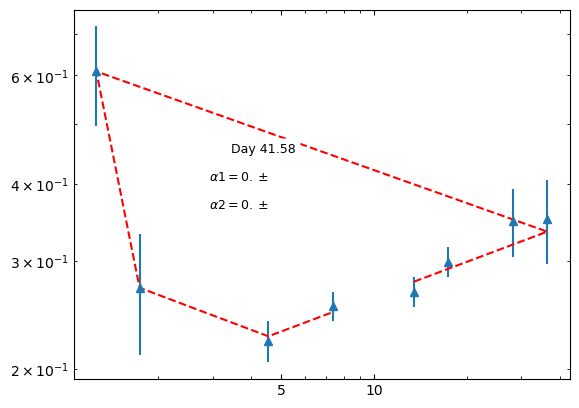

In [282]:
fig,ax = plt.subplots()
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq (GHz)'][mask], df8['Flux Density (mJy)'][mask], yerr=df8['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 41.58', xy=(160, 170), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq (GHz)'][mask], fw_BPL8(df8['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 1= 0. \\pm }$', xy=(140, 150), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1 2= 0. \\pm }$', xy=(140, 130), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();